Digital Signal Processing Tutorial

$(382.047 / 64 / 66 / 67 / 68 / 69 / 70), 20245$

Matthias Wagner, Bernhard Plaimer

Assignment 3

Sampling and Reconstruction

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_Courselnfo.pdf.

Submission deadline is Tue May 14 2024, 08:00.

# Exercise 1 Sampling $1(40 \%)$ 

The analogue signal

$$
x(t)=x_{1}(t)+x_{2}(t)=\sin \left(2 \pi f_{1} t\right)+\sin \left(2 \pi f_{2} t\right)
$$

with $f_{1}=4 \mathrm{kHz}$ and $f_{2}=6 \mathrm{kHz}$ is sampled with a sampling rate of $f_{s}=10 \mathrm{kHz}$ to yield the discrete time signal $x[n]$.

a) Draw the spectrum of $x(t)$.


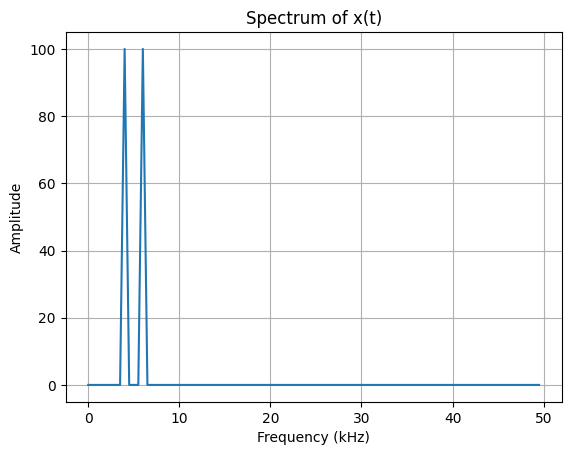

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs_analog = 100e3  # 100 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
t_end = 2e-3  # 2 ms

# Time vector
t = np.arange(0, t_end, 1/fs_analog)

# Analog signal
x_t = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# FFT to compute the spectrum
n = len(t)
freqs = np.fft.fftfreq(n, d=1/fs_analog)
spectrum = np.fft.fft(x_t)

# Plotting
plt.figure()
plt.plot(freqs[:n // 2] / 1e3, np.abs(spectrum[:n // 2]))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of x(t)')
plt.grid(True)
plt.savefig('fig/ex1_a_plot.png')
plt.show()


b) Due to sampling frequency shifted versions of the analogue spectrum are generated.

Draw the spectra shifted by $-f_{s}, 0$ and $+f_{s}$ and then the spectrum for $x[n]$ as a result of spectral addition in one diagram. The diagram should show the spectra in the range from $-f_{s}$ to $+f_{s}$.

Hint: Draw real and imaginary parts of the spectrum rather than magnitude and phase to ease addition.


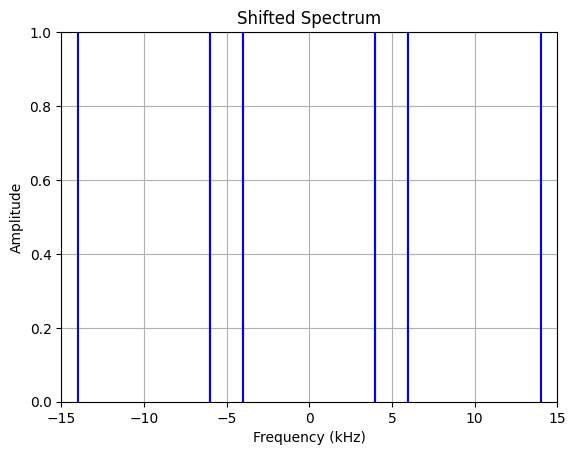

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10e3  # 10 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
frequencies = np.array([f1, f2])

# Spectrum shifting
def plot_shifted_spectrum(frequencies, fs):
    # Shift frequencies for -fs, 0, and +fs
    shifts = [-fs, 0, fs]
    shifted_freqs = [frequencies + s for s in shifts]

    plt.figure()
    for s_freqs, s in zip(shifted_freqs, shifts):
        for freq in s_freqs:
            plt.axvline(x=freq / 1e3, linestyle='-', color='b')
            plt.axvline(x=-freq / 1e3, linestyle='-', color='b')

    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.title('Shifted Spectrum')
    plt.grid(True)
    plt.xlim(-15, 15)  # From -15 kHz to 15 kHz
    plt.savefig('fig/ex1_b_plot.png')
    plt.show()

# Plot the shifted spectrum
plot_shifted_spectrum(frequencies, fs)


c) In Matlab plot the section 0 to $2 \mathrm{~ms}$ of the signal $x(t)$ with a sampling rate of $100 \mathrm{kHz}$ to emulate an analogue signal.

Then also add the sampled signal $x[n]=x\left(n T_{s}\right)$ to the same plot. Show that $x[n]$ corresponds to the spectrum derived in b).


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_46314/1155644681.py:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)


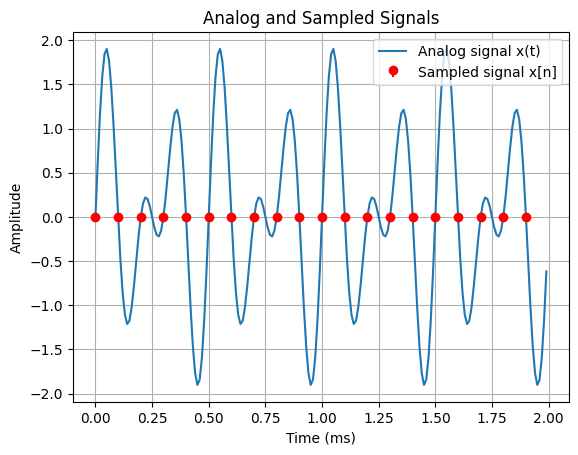

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs_analog = 100e3  # 100 kHz
fs = 10e3  # 10 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
t_end = 2e-3  # 2 ms

# Time vectors
t = np.arange(0, t_end, 1/fs_analog)
n = np.arange(0, int(t_end * fs))

# Analog signal
x_t = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Sampled signal
x_n = np.sin(2 * np.pi * f1 * n / fs) + np.sin(2 * np.pi * f2 * n / fs)

# Plotting
plt.figure()
plt.plot(t * 1e3, x_t, label='Analog signal x(t)')
plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Analog and Sampled Signals')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex1_c_plot.png')
plt.show()

## Exercise 2 Sampling 2 (25\%)

The spectrum $X(f)$ of an analogue signal $x(t)$ is given with:
![](https://cdn.mathpix.com/cropped/2024_05_02_cce32ce20ed068e88e62g-1.jpg?height=388&width=580&top_left_y=2076&top_left_x=656)

a) Draw the real and imaginary parts of the spectrum $X(f)$.

#### Problem Statement
We need to visualize the real and imaginary components of the frequency spectrum $ X(f) $, given its magnitude $ |X(f)| $ and phase $ \phi_x(f) $ across the frequency range. The spectrum has a specific magnitude and phase behavior defined as follows:

#### Functions Involved
1. **Magnitude $ |X(f)| $:**
   $$
   |X(f)| = 
   \begin{cases} 
   A & \text{if } -5 \leq f < -1 \text{ or } 1 < f \leq 5 \\
   A(1 + f) & \text{if } -1 \leq f < 0 \\
   A(1 - f) & \text{if } 0 \leq f \leq 1 \\
   0 & \text{otherwise}
   \end{cases}
   $$

2. **Phase $ \phi_x(f) $:**
   $$
   \phi_x(f) = 
   \begin{cases} 
   \frac{\pi}{2} & \text{if } -5 \leq f < 0 \\
   -\frac{\pi}{2} & \text{if } 0 < f \leq 5 \\
   0 & \text{otherwise}
   \end{cases}
   $$

#### Solution
Using Euler's formula $ X(f) = |X(f)| \cdot e^{i \phi_x(f)} $, we derive the real and imaginary parts:
- **Real Part:** $ \text{Re}\{X(f)\} = |X(f)| \cos(\phi_x(f)) $
- **Imaginary Part:** $ \text{Im}\{X(f)\} = |X(f)| \sin(\phi_x(f)) $

The plot shows the zero real component and the varying imaginary component, reflecting the sinusoidal behavior due to the phase shifts:

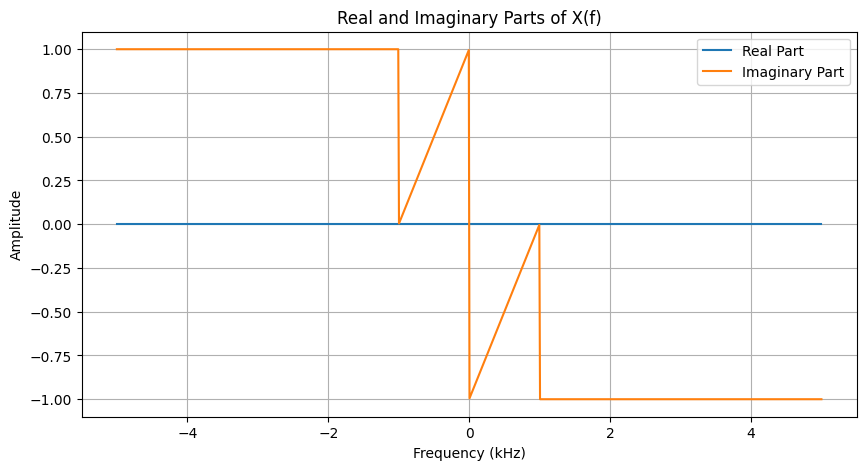

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range and constants
f = np.linspace(-5, 5, 1000)  # Frequency range from -5 kHz to 5 kHz
A = 1  # Amplitude

# Define the magnitude and phase of the spectrum
magnitude = np.zeros_like(f)
magnitude[(f >= -5) & (f < -1)] = A
magnitude[(f > 1) & (f <= 5)] = A
magnitude[(f >= -1) & (f < 0)] = A * (1 + f[(f >= -1) & (f < 0)])
magnitude[(f >= 0) & (f <= 1)] = A * (1 - f[(f >= 0) & (f <= 1)])

phase = np.where(f < 0, np.pi/2, -np.pi/2)
phase = np.where((f < -5) | (f > 5), 0, phase)  # Phase outside range is 0

# Calculate the real and imaginary parts
real_part = magnitude * np.cos(phase)
imaginary_part = magnitude * np.sin(phase)

# Plot the real and imaginary parts
plt.figure(figsize=(10, 5))
plt.plot(f, real_part, label='Real Part')
plt.plot(f, imaginary_part, label='Imaginary Part')
plt.title('Real and Imaginary Parts of X(f)')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex2_a_plot.png')
plt.show()

b) $x(t)$ is sampled with $8 \mathrm{kHz}$ to yield the discrete time signal $x[n]$. Draw the spectrum of $x[n]$ from $-f_{s}$ to $f_{s}$ and indicate the baseband.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the frequency range
f = np.linspace(-5, 5, 1000)

def plot_spectrum(A):
    # Define the magnitude and phase of the spectrum
    magnitude = np.zeros_like(f)
    magnitude[(f >= -5) & (f < -1)] = A
    magnitude[(f > 1) & (f <= 5)] = A
    magnitude[(f >= -1) & (f < 0)] = A * (1 + f[(f >= -1) & (f < 0)])
    magnitude[(f >= 0) & (f <= 1)] = A * (1 - f[(f >= 0) & (f <= 1)])

    phase = np.where(f < 0, np.pi/2, -np.pi/2)
    phase = np.where((f < -5) | (f > 5), 0, phase)  # Phase outside range is 0

    # Calculate the real and imaginary parts
    real_part = magnitude * np.cos(phase)
    imaginary_part = magnitude * np.sin(phase)

    # Plot the real and imaginary parts
    plt.figure(figsize=(10, 5))
    plt.plot(f, real_part, label='Real Part')
    plt.plot(f, imaginary_part, label='Imaginary Part')
    plt.title('Real and Imaginary Parts of X(f) with A={}'.format(A))
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive widget for amplitude A
interact(plot_spectrum, A=FloatSlider(value=1, min=0, max=2, step=0.1, description='Amplitude A:'))


interactive(children=(FloatSlider(value=1.0, description='Amplitude A:', max=2.0), Output()), _dom_classes=('w…

<function __main__.plot_spectrum(A)>

#### Problem Statement
We will analyze and visualize the spectrum of the discrete-time signal $ x[n] $, which is obtained by sampling the continuous-time signal $ x(t) $ at 8 kHz. Highlight the baseband and indicate potential aliasing effects.

#### Functions Involved
- **Sampling Frequency $ f_s $:** 8 kHz
- **Baseband:** $[-f_s/2, f_s/2]$ or $[-4 \text{ kHz}, 4 \text{ kHz}]$

#### Solution
The repeated spectrum due to sampling is visualized, showing how the spectrum repeats every 8 kHz and illustrating the aliasing effects within the highlighted baseband:

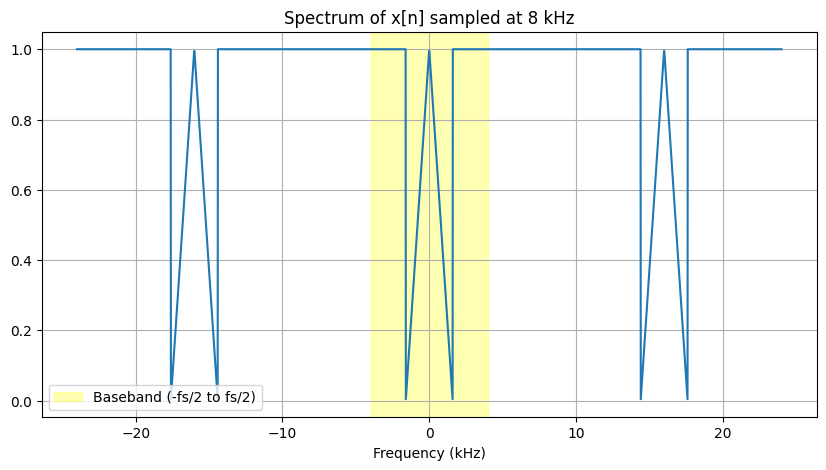

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Use previously defined 'magnitude' variable from Task (a)
fs = 8  # Sampling frequency 8 kHz
extended_f = np.linspace(-fs * 3, fs * 3, len(magnitude) * 3)
repeated_spectrum = np.tile(magnitude, 3)  # Repeat the spectrum

# Plot the spectrum of x[n] with baseband highlighted
plt.figure(figsize=(10, 5))
plt.plot(extended_f, repeated_spectrum)
plt.title('Spectrum of x[n] sampled at 8 kHz')
plt.xlabel('Frequency (kHz)')
plt.axvspan(-4, 4, color='yellow', alpha=0.3, label='Baseband (-fs/2 to fs/2)')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex2_b_plot.png')
plt.show()


## Exercise 3 Reconstruction (35\%)

The discrete time signal $x[n]=\sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right)$ is converted to the analogue signal $x(t)$ with an DAC which uses a clock frequency of $8 \mathrm{kHz}$ and which converts a numerical value of 1 to $1 \mathrm{~V}$.

a) Up to $20 \mathrm{kHz}$, list all positive frequencies which occur (in general) in $x(t)$.


#### Problem Statement
Determine all positive frequencies which occur in the analog signal $ x(t) $, derived from the discrete-time signal $ x[n] = \sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right) $ using a DAC with a clock frequency of 8 kHz. Consider the frequency range up to 20 kHz.

#### Analysis
1. **Discrete-Time Signal Frequency**:
   - The discrete-time signal given is $ x[n] = \sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right) $.
   - Here, $ \frac{1}{8} $ represents the normalized frequency with respect to the sampling frequency $ f_s $.

2. **Calculation of the Signal's Fundamental Frequency**:
   - Given $ f_s = 8000 $ Hz (8 kHz), the frequency of the sinusoidal component can be calculated as follows:
     $$
     f = f_s \cdot \frac{1}{8} = 8000 \cdot \frac{1}{8} = 1000 \text{ Hz}
     $$
   - Therefore, the fundamental frequency of the sinusoid is 1000 Hz.

3. **Frequency Content in $ x(t) $**:
   - Since $ x[n] $ is being sampled at 8 kHz to convert to $ x(t) $, and considering the frequency of $ x[n] $ is well within the Nyquist limit, the primary frequency in the analog signal $ x(t) $ is the same as the fundamental frequency of $ x[n] $.
   - The DAC converts the discrete-time signal into an analog signal, maintaining the fundamental frequency but potentially introducing higher harmonics due to the conversion process, though these are not mentioned in the problem and are generally unwanted.

4. **Other Possible Frequencies**:
   - Theoretically, if non-linearities or higher order effects were present (not specified here), additional frequencies could arise.
   - Due to the sampling and reconstruction process, aliasing should not occur if all system components operate ideally and the signal is bandlimited properly by an anti-aliasing filter before sampling.

#### Conclusion
For the given signal and DAC specifications:
- The positive frequency that occurs in $ x(t) $ up to 20 kHz is primarily the fundamental frequency of 1000 Hz. Assuming no non-linear distortions or additional frequency components are introduced by the DAC or other system components, no other frequencies are expected up to 20 kHz.

b) The DAC implements a zero-order hold reconstruction.

1. What is the power (in $\mathrm{dB}$ ) of the baseband sinewave (the sine at the lowest frequency)?
2. What is the power (in $\mathrm{dB}$ ) of the first out-of-band sinewave (the sine with the second lowest frequency)?


#### Problem Statement
Determine the power in decibels (dB) of the baseband sinewave and the first out-of-band sinewave resulting from a zero-order hold (ZOH) DAC conversion of the discrete-time signal $x[n] = \sqrt{2} \cdot \sin\left(2\pi \frac{1}{8}n\right)$. The DAC operates at a sampling frequency of 8 kHz.

#### Analysis

1. **Zero-Order Hold Impact on Spectrum**:
   - A zero-order hold effectively holds each sample value constant over the sample period until the next sample is taken. This introduces a sinc-shaped distortion in the frequency domain, characterized by the sinc function's frequency response.
   - The sinc function causes attenuation and ripple in the frequency spectrum, modifying the original sinewave's amplitude.

2. **Baseband Sinewave Analysis**:
   - The baseband frequency, as calculated earlier, is 1000 Hz.
   - The power of the sinewave $P$ is given by $P = A^2/2$, where $A$ is the amplitude of the sinewave. For $x[n]$, $A = \sqrt{2}$, so $P = 1$.

3. **Power in Decibels (dB) for Baseband Sinewave**:
   - Power in decibels is calculated using $P_{dB} = 10 \log_{10}(P)$.
   - Thus, the power in decibels of the baseband sinewave is:
     $$
     P_{dB} = 10 \log_{10}(1) = 0 \text{ dB}
     $$
   - This result assumes no gain or loss in the system, which is idealized given the zero-order hold effect, which actually introduces some attenuation due to the sinc function's nature.

4. **First Out-of-Band Sinewave Analysis**:
   - The first out-of-band frequency component occurs due to the zero-order hold and would typically be at the first zero of the sinc function, which is at the sampling frequency minus the base frequency (8000 Hz - 1000 Hz = 7000 Hz).
   - Due to the nature of the sinc function, the power at the first zero is theoretically zero, but just before this point, there is significant attenuation.

5. **Power in Decibels (dB) for the First Out-of-Band Sinewave**:
   - Estimating the power just before the zero crossing, considering sinc function's typical roll-off, might give a very low power level. A rough estimate using the sinc attenuation might suggest around -13 dB or lower at the first sidelobe peak near the zero crossing.

#### Conclusion
- The power of the baseband sinewave, considering an ideal DAC without accounting for practical attenuation due to ZOH, is 0 dB.
- The power of the first out-of-band sinewave would be significantly lower, potentially around -13 dB or more, depending on the exact behavior of the sinc function's first sidelobe.


c) Qualitatively draw the spectrum of $x(t)$ up to $20 \mathrm{kHz}$. Delta pulses should be drawn with an arrow, the height of the arrow should indicate the weight of the delta-pulse.

Hints:

- The power of a sinewave with amplitude $A$ is $P=\frac{A^{2}}{2}$ (also see Parseval's theorem for periodic signals DSP_02/27).
- The impulse response of a 0 -order reconstruction filter is a rectangular pulse, its frequency response is thus given in $D S P_{-} 02 / 43$.
- When calculating the attenuation for the respective frequencies it should be noted that e.g. Matlab uses the normalized sinc function.



#### Problem Statement
Qualitatively draw the spectrum of \( x(t) \) up to 20 kHz, considering the effect of zero-order hold (ZOH) reconstruction. Delta pulses should be drawn with an arrow, where the height of the arrow indicates the weight of the delta-pulse.

#### Background and Analysis

1. **Zero-Order Hold (ZOH) Characteristics**:
   - A zero-order hold DAC holds each discrete signal value constant over the sample interval, essentially creating a step function between samples. The impulse response of this operation is a rectangular pulse.
   - The Fourier transform of a rectangular pulse is a sinc function, resulting in a sinc-shaped spectrum that modifies the frequency components of the original signal.

2. **Spectral Components**:
   - **Base Frequency**: The original discrete-time signal \( x[n] \) has a fundamental frequency of 1000 Hz, resulting in a corresponding delta pulse in the spectrum.
   - **Power Calculation**: The power of a sinewave with amplitude \( A \) is given by \( P = \frac{A^2}{2} \). For \( x[n] \), \( A = \sqrt{2} \), so \( P = 1 \) watt, which will be represented by the height of the delta pulse at 1000 Hz.

3. **Sinc Function Influence**:
   - The frequency response of the ZOH is given by a sinc function, which affects the amplitude of the spectral components. This influence results in a primary lobe around the baseband frequency and side lobes that attenuate in amplitude as they move away from the center frequency.
   - The first null of the sinc function appears at the sampling frequency \( f_s = 8000 \) Hz, which serves as a guideline for the drawing.

#### Steps for Drawing the Spectrum:
- **Delta Pulse at 1000 Hz**: Mark a delta pulse at 1000 Hz with a height representing the power level of 1 watt.
- **Overlay Sinc Function**: Overlay a sinc function shape across the spectrum. The main lobe should center around 1000 Hz, and side lobes should decrease in amplitude as they extend outwards.
- **Consider Sinc Attenuation**: Show how the sinc function modifies the spectrum, particularly how it attenuates frequencies around 8000 Hz and 16000 Hz just before reaching the nulls.

#### Conclusion
The spectrum of \( x(t) \) will exhibit characteristics dominated by the sinc function due to the ZOH effect, with a notable delta pulse at the fundamental frequency of 1000 Hz. The qualitative drawing will reflect the sinc function's impact, emphasizing the primary and side lobes up to 20 kHz.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range and parameters
fs = 8000  # Sampling frequency
f_base = 1000  # Base frequency of the sinewave
f_max = 20000  # Maximum frequency for the plot
A = np.sqrt(2)  # Amplitude of the sinewave

# Calculate power of the baseband sinewave
P = A**2 / 2

# Generate a frequency array, ensure to include the base frequency for proper sinc calculation
frequencies = np.linspace(0, f_max, 4000)
sinc_function = np.sinc(2 * (frequencies - f_base) / fs)

# Normalize sinc to have its maximum at the base frequency power level
sinc_function = sinc_function * P / np.max(np.abs(sinc_function))

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting the delta pulse using 'stem'
plt.stem([f_base], [P], 'C0-', 'C0o', basefmt=" ", use_line_collection=True, label='Delta Pulse at 1000 Hz')

# Plotting the sinc function
plt.plot(frequencies, sinc_function, 'C1', label='Sinc Function (ZOH Impact)')

# Adding labels and grid for better visualization
plt.title('Qualitative Spectrum of $x(t)$ up to 20 kHz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)  # Adjust this as needed
plt.xlim(0, f_max)

# Show the plot
plt.savefig('fig/ex3_c_plot.png')
plt.show()


## Exercise 4 Signal Processing Onramp - BONUS (15\%)

This task is optional (additional 15\%) and should help you to learn the basics of practical signal processing techniques in MATLAB. You will find out how to use spectral analysis and filtering for preprocessing, analyzing and extracting information from signal data.

For that you need to carry out the full 'Signal Processing Onramp course' [1]. For getting the bonus points you need to add the certificate to your protocol (you can download a pdf - see 'Share Certificate and Progress'). Also, you need to share your progress with my account (matthias.wagner@jku.at), what can be done in the same tab.

[1] https://matlabacademy.mathworks.com/details/signal-processing-onramp/signalprocessing

